In [ ]:
import time # to time the execution
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
!wget "https://raw.githubusercontent.com/Dunggam/AutoDamage-Vision/main/Week%200/Assignment/spice_locations%20(1).txt"
!mv "spice_locations (1).txt" spice_locations.txt

--2025-12-15 07:34:12--  https://raw.githubusercontent.com/Dunggam/AutoDamage-Vision/main/Week%200/Assignment/spice_locations%20(1).txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3044 (3.0K) [text/plain]
Saving to: ‘spice_locations (1).txt’

spice_locations (1) 100%[===================>]   2.97K  --.-KB/s    in 0s      

2025-12-15 07:34:12 (44.2 MB/s) - ‘spice_locations (1).txt’ saved [3044/3044]



In [ ]:
def load_data(data_path):

    return np.loadtxt(data_path, delimiter=',')

In [ ]:
spice_locations = load_data("spice_locations.txt")
print(spice_locations)

[[-2.12729941e+00  1.75357153e+00]
 [-3.40030291e-01 -6.70757901e-03]
 [-3.21990680e+00 -2.22002740e+00]
 [-3.70958194e+00  1.33088073e+00]
 [-9.94424941e-01  5.40362889e-01]
 [-3.89707753e+00  1.84954926e+00]
 [ 1.62213204e-01 -1.93830445e+00]
 [-3.09087516e+00 -2.08297745e+00]
 [-2.47878879e+00 -3.76217842e-01]
 [-1.84027491e+00 -1.54385430e+00]
 [-9.40735526e-01 -2.30253070e+00]
 [-2.53927676e+00 -1.16819078e+00]
 [-1.71965008e+00  9.25879807e-01]
 [-3.00163109e+00 -4.28827808e-01]
 [-1.03792716e+00 -2.76774794e+00]
 [-9.62275740e-01 -2.14737938e+00]
 [-3.67474204e+00  1.74442769e+00]
 [ 8.28160165e-01  1.04198674e+00]
 [-2.47693115e+00 -2.51163943e+00]
 [-5.78834867e-01 -7.99237531e-01]
 [-3.38980883e+00 -5.24115449e-01]
 [-3.82805739e+00  1.54660201e+00]
 [-2.70610009e+00  3.12611422e-01]
 [-2.44144462e+00 -3.99659894e-01]
 [-1.26644860e+00 -2.07572772e+00]
 [ 8.47923139e-01  8.75664117e-01]
 [ 6.97494708e-01  1.47413675e+00]
 [-1.01050011e+00  1.60937118e+00]
 [-3.55753749e+00 -2

In [ ]:
def initialise_centers(data, K, init_centers=None):

  if init_centers is None:

        indices = np.random.choice(data.shape[0], K, replace=False)
        centers = data[indices]

  else:
        centers = init_centers

  return centers

In [ ]:
centers = initialise_centers(spice_locations, 3)
print(centers)

[[ 5.64803089  6.18778736]
 [ 3.44875726  3.80610644]
 [-0.94073553 -2.3025307 ]]


In [ ]:
def initialise_labels(data):

  N = data.shape[0]
  labels = np.ones(N, dtype=int)

  return labels

In [ ]:
labels = initialise_labels(spice_locations)
print(labels)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


In [ ]:
def calculate_distances(data, centers):

  diff = data[:, np.newaxis, :] - centers[np.newaxis, :, :]

  distances = np.linalg.norm(diff, axis=2)

  return distances

In [ ]:
distances = calculate_distances(spice_locations, centers)
print(distances.shape)
print(distances[:5])

(60, 3)
[[ 8.95086762  5.94182695  4.22609739]
 [ 8.61560469  5.37517087  2.37310989]
 [12.22013371  8.98806817  2.28066404]
 [10.54298155  7.57420375  4.5681713 ]
 [ 8.71869386  5.51424963  2.84340052]]


In [ ]:
def update_labels(distances):

  labels = np.argmin(distances, axis=1)

  return labels

In [ ]:
labels = update_labels(distances)
print(labels.shape)
print(np.unique(labels))

(60,)
[0 1 2]


In [ ]:
def update_centers(data, labels, K):

  for k in range(K):
        cluster_points = data[labels == k]

        if cluster_points.shape[0] > 0:
            centers[k] = cluster_points.mean(axis=0)

  return centers

In [ ]:
new_centers = update_centers(spice_locations, labels, K=3)
print(new_centers.shape)
print(new_centers)

(3, 2)
[[ 5.42205993  5.85281796]
 [ 3.1412848   4.46689564]
 [-2.02640443 -0.45364387]]


In [ ]:
def check_termination(labels1, labels2):

  return np.array_equal(labels1, labels2)

In [ ]:
print(check_termination(np.array([0,1,1]), np.array([0,1,1])))
print(check_termination(np.array([0,1,1]), np.array([1,1,0])))

True
False


In [ ]:
def kmeans(data_path:str, K:int, init_centers):
    '''
    Input :
        data (type str): path to the file containing the data
        K (type int): number of clusters
        init_centers (type numpy.ndarray): initial centers. shape = (K, 2) or None
    Output :
        centers (type numpy.ndarray): final centers. shape = (K, 2)
        labels (type numpy.ndarray): label of each data point. shape = (N,)
        time (type float): time taken by the algorithm to converge in seconds
    N is the number of data points each of shape (2,)
    '''
    data = load_data(data_path)
    centers = initialise_centers(data, K, init_centers)
    labels = initialise_labels(data)

    start_time = time.time() # Time stamp

    while True:
        distances = calculate_distances(data, centers)
        labels_new = update_labels(distances)
        centers = update_centers(data, labels_new, K)
        if check_termination(labels, labels_new): break
        else: labels = labels_new

    end_time = time.time() # Time stamp after the algorithm ends
    return centers, labels, end_time - start_time

In [ ]:
def visualise(data_path, labels, centers):

    data = load_data(data_path)

    plt.figure()
    plt.scatter(data[:, 0], data[:, 1], c=labels)

    plt.scatter(centers[:, 0], centers[:, 1], c='red', marker='x')

    plt.title('K-means clustering')
    plt.xlabel('Longitude')
    plt.ylabel('Latitude')

    plt.savefig('kmeans.png')

    return plt

Time taken for the algorithm to converge: 0.0009715557098388672


<module 'matplotlib.pyplot' from '/usr/local/lib/python3.12/dist-packages/matplotlib/pyplot.py'>

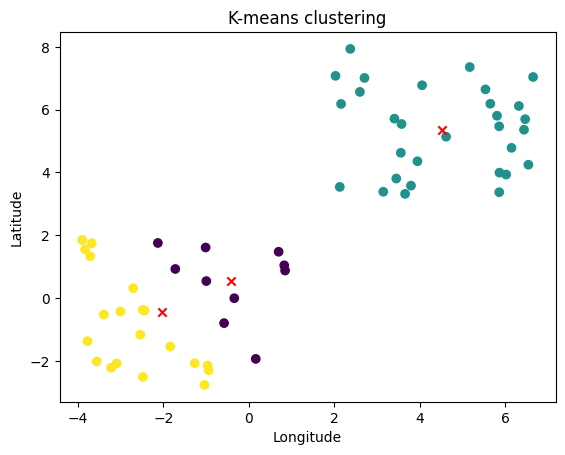

In [ ]:
data_path = 'spice_locations.txt'
K, init_centers = 2, None
centers, labels, time_taken = kmeans(data_path, K, init_centers)
print('Time taken for the algorithm to converge:', time_taken)
visualise(data_path, labels, centers)